<a href="https://colab.research.google.com/github/stanfordbshan/CompMatBook/blob/main/Chapter06/6_3_4_%E5%88%86%E5%AD%90%E5%8A%A8%E5%8A%9B%E5%AD%A6%E4%B8%AD%E7%9A%84%E7%A7%AF%E5%88%86%E7%AE%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2023 @ Authors</i></b><br/>
        作者：<a style="font-weight:bold" href="mailto:bshan@mail.hust.edu.cn">斯坦福大厨 📨 </a><br>
        日期：2023-09-28<br/>
        <img src="https://github.com/stanfordbshan/CompMatBook/blob/main/author.png?raw=true" width="100"/>
        共享协议：本作品采用<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议</a>进行许可。</i><br/>
        快速开始：点击上方的 <span style="background-color:rgb(85, 91, 228); color:white; padding: 3px; border-radius: 5px;box-shadow: 2px 2px 3px rgba(0, 0, 0, 0.3); font-size:0.75rem;">开始连接</span> 按钮，选择 <span style='color:rgb(85,91,228); font-weight:bold'>Bohrium-Notebook</span> 镜像及 <span style='color:rgb(85,91,228); font-weight:bold'>c2_m4_cpu</span> 节点配置，稍等片刻即可运行。
    </p>
</div>

恭喜您已经发现了这份神奇的计算材料学课件！这份课件是我在熬夜吃掉不计其数的披萨和咖啡后创作出来的，配套的教材是由单斌、陈征征、陈蓉合著的《计算材料学--从算法原理到代码实现》。学习资料合集您可以在这个网址找到：[www.materialssimulation.com/book](http://www.materialssimulation.com/book)，您也可以跟着up主[无人问津晦涩难懂的B站视频](https://space.bilibili.com/1111135013/channel/collectiondetail?sid=1458375)一起进行学习。希望它能帮您在计算材料学的道路上摔得不那么痛。

就像您尊重那些一边烘焙披萨一边写代码的大厨一样，当您使用这份课件时，请：

- 记得告诉大家这份课件是斯坦福大厨写的，并且他在华中科技大学微纳中心工作
- 别用它去赚大钱，这个课件是用来学习的，不是用来买披萨的
- 保持开放共享的精神




如果你有关于计算材料学的想法，或者你只是想和我讨论最好吃的披萨口味，欢迎通过邮件 bshan@mail.hust.edu.cn 联系我。

# 目录（对应《计算材料学》章节6.3）

<img src="https://github.com/stanfordbshan/CompMatBook/blob/main/cover.png?raw=true" width="200"/>

* [分子动力学积分算法](#Integrator)
* [Python实现](#Python)
    * [1. HarmonicOscillator类](#HO)
    * [2. 前向Euler算法](#Euler)
    * [3. Verlet算法](#Verlet)
    * [4. Velocity Verlet算法](#VelocityVerlet)
    * [5. Leapfrog算法](#Leapfrog)
* [参考](#references)

<a name="Integrator"></a>
# **分子动力学积分算法简介**

分子动力学模拟方法对物质的微观运动进行数值模拟，以研究其宏观性质。其核心环节是积分算法，该算法基于牛顿的第二定律预测系统的时间演化轨迹。

1. **算法核心**：牛顿的第二定律 $ F = ma $，其中 $ F $ 是作用在粒子上的合力， $ m $ 是粒子的质量， $ a $ 是粒子的加速度。

2. **Euler方法**：这是最直接的积分方法。给定一个时间步长 $ \Delta t $，新的位置是通过 $ r(t + \Delta t) = r(t) + v(t) \Delta t $ 来计算的。然后，使用 $ F = ma $ 来更新速度 $ v(t + \Delta t) $。

3. **Verlet算法**：Verlet方法是通过考虑时间 $ t $ 和 $ t-\Delta t $ 的两个状态来预测 $ t+\Delta t $ 时刻的状态。其具有良好的能量守恒特性，因此常被用于长时间的模拟。

4. **Velocity Verlet方法**：与普通的Verlet算法相似，但它还包括速度的更新，使得温度和动量的控制变得更为直接。它首先使用当前的力和位置来预测新的速度和位置，然后用新的位置来计算新的力，最后用新的力来修正速度。

5. **Leapfrog方法**：在此方法中，速度和位置的计算是“交错”的。速度在半个时间步长后被计算，并用于计算新的位置，之后使用新的位置再次更新速度。这种方法的名称源于速度和位置像青蛙跳跃一样“交错”前进。

6. **时间步长选择**：时间步长 $ \Delta t $ 的选择对模拟的准确性至关重要。如果选择得太大，可能会错过系统中的高频振动。一般而言，时间步长应选择为系统中最高频率振动的周期的十分之一左右。

总的来说，分子动力学的积分算法是预测原子和分子如何随时间变化的关键工具。合适的积分算法和参数的选择对于得到准确和物理上有意义的模拟结果至关重要。我们下面对几种常见的积分算法进行介绍。

---

<a name="Python"></a>
# **积分算法的Python实现**

<a name="HarmonicOscillator"></a>
## 1. HarmonicScillator类代表一维谐振子运动方程

在这个notebook里，我们将用典型的分子动力学算法对于一维谐振子的运动进行积分。由于一维谐振子有解析解，所以我们可以将数值积分的结果与解析形式相比对，从而对误差积累，算法稳定性等有一个直观的认识。一维谐振子的解析解如下：

1. 位置:

   $x(t) = x_0 \cos(wt) + \frac{v_0}{w} \sin(wt)$

2. 速度:

   $v(t) = -x_0 w \sin(wt) + v_0 \cos(wt)$

where,
$w = \sqrt{\frac{k}{m}}$


我们首先定义一个HarmonicOscillator的类，用于描述谐振子：

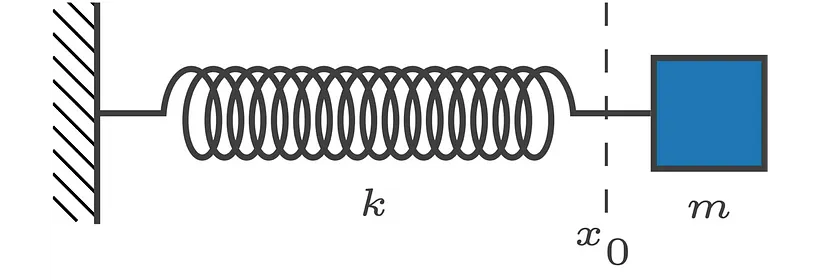

In [ ]:
import numpy as np

class HarmonicOscillator:
    def __init__(self, k, m):
        self.k = k
        self.m = m

    def acceleration(self, x):
        return -self.k * x / self.m

    def analytical_solution(self, x0, v0, t):
        """
        Calculate the analytical solution for the 1D harmonic oscillator.

        Parameters:
        x0 : float
            Initial position.
        v0 : float
            Initial velocity.
        t : float
            Time at which to calculate the position and velocity.

        Returns:
        x : float
            Position at time t.
        v : float
            Velocity at time t.
        """
        w = np.sqrt(self.k / self.m)  # angular frequency
        x = x0 * np.cos(w*t) + v0/w * np.sin(w*t)
        v = -x0 * w * np.sin(w*t) + v0 * np.cos(w*t)
        return x, v


我们可以用这样的方法来创建一个HarmonicOscillator实例，它的acceleration函数会告诉你谐振子处在位置x处的加速度

In [ ]:
# Set up the system
k = 1.0  # spring constant
m = 1.0  # mass
oscillator = HarmonicOscillator(k, m)
oscillator.acceleration(1.0)

-1.0

<a name="Euler"></a>
## 2. 前向Euler算法

前向Euler积分算法是一种简单的初值问题数值解法，通常用于常微分方程的数值模拟。该方法的主要思想是使用泰勒级数将微分方程展开，然后用前向差分来近似导数，从而推进时间步。

前向Euler方法是一种显式方法，它根据当前状态（即在第n个时间步）的信息来预测下一个状态（即在第n+1个时间步）。具体地，对于一个常微分方程dy/dt = f(y, t)，前向Euler方法更新y的方式如下：

y(n+1) = y(n) + dt * f(y(n), t(n))

其中，y(n)是在第n个时间步的解，dt是时间步长，f(y, t)是微分方程的右侧函数。

前向Euler方法的一个主要优点是其简单性：只需要当前状态就可以预测下一个状态。然而，它也有一些缺点：尽管它是一阶精确的（即随着时间步长的减小，误差按线性规模减小），但是对于长时间的模拟或对精度要求高的模拟，前向Euler方法可能会带来较大的误差。此外，它也不是辛普莱克的，因此可能无法很好地保守物理系统的能量。

在使用前向Euler方法时，需要根据问题的具体需求来适当选择时间步长，并在必要时考虑使用更高阶的数值积分方法。

In [ ]:
class ForwardEulerIntegrator:
    """
    A numerical integrator using the Forward Euler method.
    """

    def __init__(self, dt):
        """
        Initialize the integrator.

        Parameters:
        dt : float
            Time step for the numerical integration.
        """
        self.dt = dt

    def step(self, system, x, v):
        """
        Perform one integration step.

        Parameters:
        system : object
            The physical system to be integrated. It should have a method `acceleration(x)` that computes the acceleration.
        x : float
            Current position.
        v : float
            Current velocity.

        Returns:
        float, float
            Updated position and velocity.
        """
        a = system.acceleration(x)
        x_new = x + self.dt * v
        v_new = v + self.dt * a

        return x_new, v_new


定义一个helper function

In [ ]:
import matplotlib.pyplot as plt

def plot_results(times, positions, velocities):
    """
    Plot the time evolution of position and phase space trajectory.

    This function generates two subplots: one showing the position as a function
    of time, and one showing the phase space trajectory (velocity vs. position).

    Parameters:
    times : list of float
        List of times at which the position and velocity were recorded.
    positions : list of float
        List of positions of the harmonic oscillator at the corresponding times.
    velocities : list of float
        List of velocities of the harmonic oscillator at the corresponding times.

    Returns:
    None
    """

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.plot(times, positions)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Position')
    ax1.set_title('Time Evolution of Position')

    ax2.plot(positions, velocities)
    ax2.set_xlabel('Position')
    ax2.set_ylabel('Velocity')
    ax2.set_title('Phase Space Trajectory')

    plt.tight_layout()
    plt.show()


我们可以用前向Euler积分器进行一维谐振子的求解。

可以很明显地看到，前向Euler方法可能导致所模拟系统的能量逐渐增加，这是因为在每一步积分中，由于一阶近似的误差，系统的动能和势能可能都会被高估。这就像在每一步都向系统“注入”了一点额外的能量。这种现象在数值模拟领域常被称为"过热"。

这也是为什么在需要长时间模拟，或者对模拟精度要求较高的场合，通常会使用更高阶，或者保守能量的积分方法，例如Verlet积分等满足Symplectic条件的方法，而不是前向Euler方法。

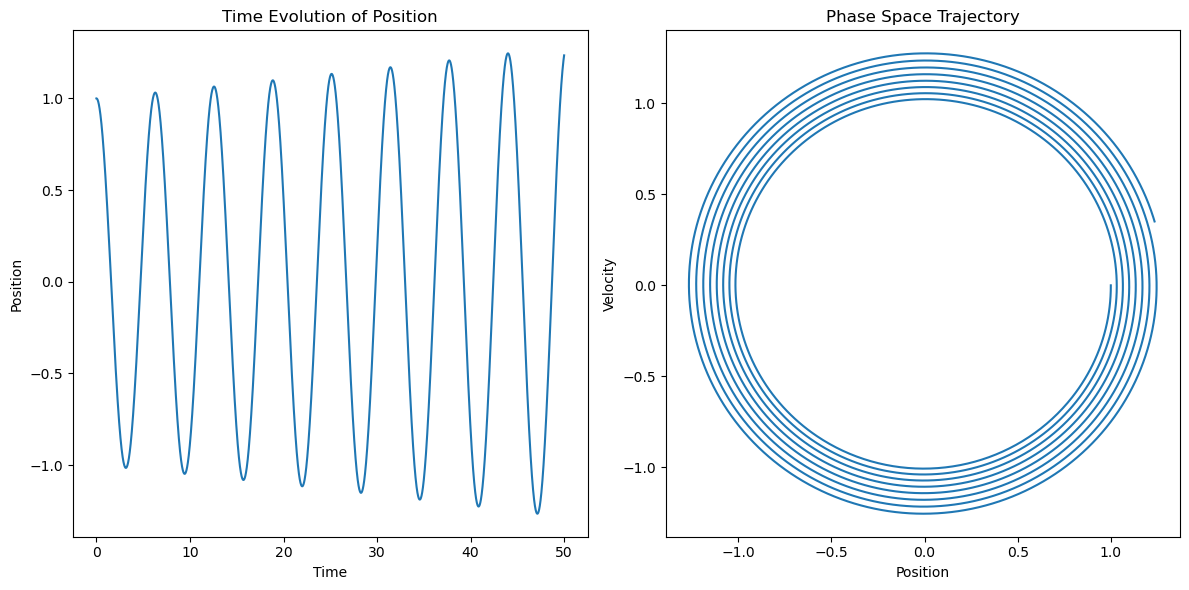

In [ ]:
import math

def main():
    # Set up the system
    k = 1.0  # spring constant
    m = 1.0  # mass
    oscillator = HarmonicOscillator(k, m)

    # Set up the integrator
    dt = 0.01  # time step
    integrator = ForwardEulerIntegrator(dt)

    # Initial conditions
    x = 1.0  # initial position
    v = 0.0  # initial velocity

    # Lists to store time, positions, and velocities
    times = []
    positions = []
    velocities = []

    # Time evolution
    for i in range(5000):
        times.append(i * dt)
        positions.append(x)
        velocities.append(v)
        x, v = integrator.step(oscillator, x, v)


    plot_results(times, positions, velocities)

if __name__ == "__main__":
    main()

<a name="Verlet"></a>
## 3. Verlet积分算法

Position Verlet算法（也被称为Verlet积分）是一种在计算物理学中常用于解决牛顿运动方程的数值积分算法。它由法国物理学家Loup Verlet在1960年代提出，用于模拟分子动力学系统。

基本的Verlet积分算法使用当前和前一个时间步长的位置信息来计算下一个时间步长的位置，同时保证能量守恒。这使得它在模拟许多物理系统，尤其是分子动力学模拟中非常实用，因为这种模拟通常需要长时间保持精度。接下来我们将Verlet积分算法封装在VerletIntegrator类里，位置verlet算法的时间更新步如下：

$$r(t+\Delta t)=2r(t)-r(t-\Delta t)+a\Delta t^2+O(\Delta t^4)$$

$$v(t)=\frac{r(t+\Delta t)-r(t-\Delta t)}{2\Delta t}+O(\Delta t^2)$$

特别要注意的是，Verlet不是一个自启动的算法，所以第一步的时候，我们需要根据初始的速度，反推前一步的位置。只有同时有当前步和前一步的位置信息，Verlet算法才能够更新迭代获得下一步的位置信息。其基本的算法过程如下图所示：

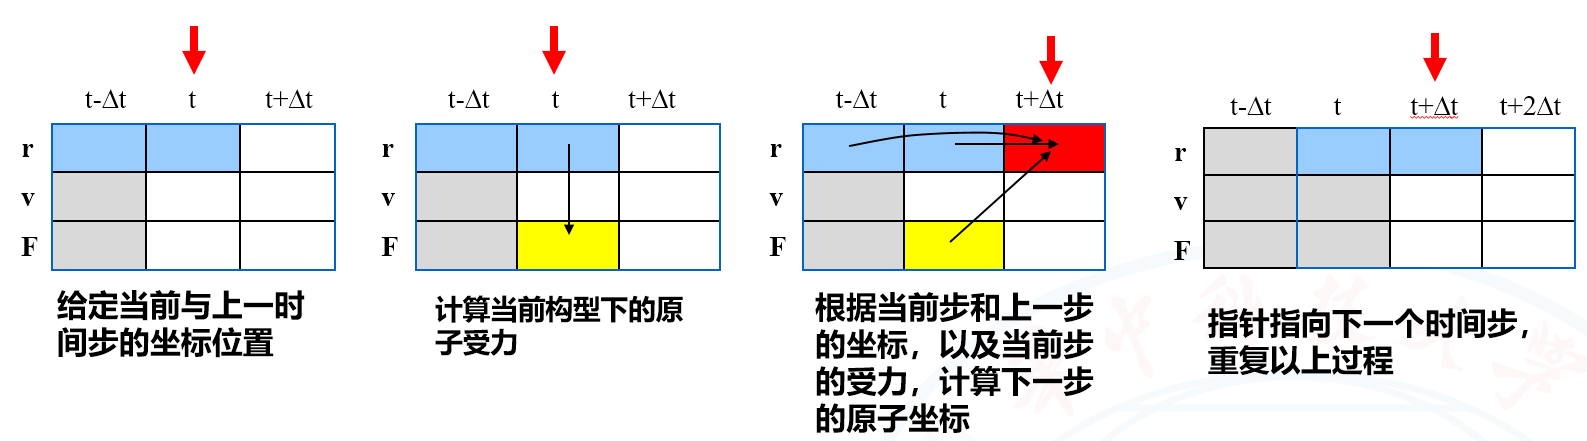

In [ ]:
class VerletIntegrator:
    def __init__(self, dt):
        self.dt = dt
        self.previous_x = None

    def step(self, system, x, v0=None):
        '''
        Perform verlet integration on a system, stores x as previous_x and returns the new_x

        Args:
          system (class): simulation system class, should provide acceleration() method
          x (float): current position
          v0 (float): initial velocity

        Returns:
          new_x: float
              the position at the next time step
          current_v : float
              the velocity at the current time step

        '''
        if self.previous_x is None:
            # On the first step, we can't do a full Verlet update because we
            # don't have a previous_x. Instead, we estimate previous_x using a
            # first-order Taylor expansion, taking into account initial velocity
            self.previous_x = x - v0*self.dt + 0.5*system.acceleration(x) * self.dt ** 2

        # Calculate new position using Verlet algorithm
        a = system.acceleration(x)
        new_x = 2*x - self.previous_x + a * self.dt ** 2

        # Calculate the velocity for the current position
        if self.previous_x is not None:
            current_v = (new_x - self.previous_x) / (2*self.dt)
        else:
            current_v = v0

        # Update previous_x for the next step
        self.previous_x = x

        return new_x, current_v

接下来我们用dt=0.01的步长进行1000步的Verlet积分运算

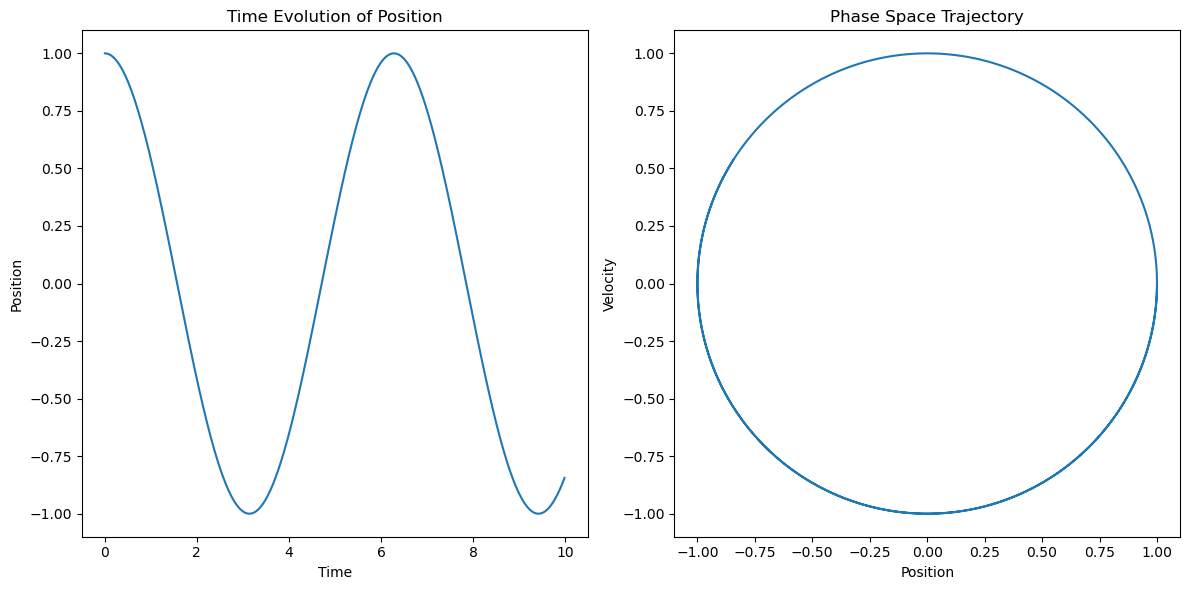

In [ ]:
import math

def main():
    # Set up the system
    k = 1.0  # spring constant
    m = 1.0  # mass
    oscillator = HarmonicOscillator(k, m)

    # Set up the integrator
    dt = 0.01  # time step
    integrator = VerletIntegrator(dt)

    # Initial conditions
    x = 1.0  # initial position
    v = 0.0  # initial velocity

    # Lists to store time, positions, and velocities
    times = []
    positions = []
    velocities = []

    # Time evolution
    for i in range(1000):
        times.append(i * dt)
        positions.append(x)
        x, v = integrator.step(oscillator, x, v)
        velocities.append(v)

    plot_results(times, positions, velocities)

if __name__ == "__main__":
    main()


上图展示了一维谐振子的位置和速度随时间变化的图像，当积分步长为$\Delta t=0.01$时，Verlet算法表现出了很好的稳定性。通过$r(t)$的振幅图可以看出，Verlet算法能够很好地维持正弦或余弦函数的振荡模式，并且振幅随时间保持恒定。同时，$r(t)\sim v(t)$图形成了一个封闭的圆环，这与理论上一维谐振子的相空间区域完全吻合，说明Verlet算法能够很好地保持系统动力学的守恒性质。

Verlet算法的误差积累

In [ ]:
def plot_differences(times, diff_positions, diff_velocities):
    """
    Plot the differences in position and velocity.

    Parameters:
    times : array
        Array of time points.
    diff_positions : array
        Array of absolute differences in position.
    diff_velocities : array
        Array of absolute differences in velocity.

    Returns:
    None
    """
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(times, diff_positions)
    plt.xlabel('Time')
    plt.ylabel('Absolute difference in position')
    plt.title('Position Difference: Numerical vs Analytical')

    plt.subplot(1, 2, 2)
    plt.plot(times, diff_velocities)
    plt.xlabel('Time')
    plt.ylabel('Absolute difference in velocity')
    plt.title('Velocity Difference: Numerical vs Analytical')

    plt.tight_layout()
    plt.show()


def compare_solutions(oscillator, integrator, x0, v0, T, dt):
    """
    Compare the numerical integration to the analytical solution.

    Parameters:
    oscillator : HarmonicOscillator
        The HarmonicOscillator system.
    integrator : VerletIntegrator
        The VerletIntegrator used for numerical integration.
    x0 : float
        Initial position.
    v0 : float
        Initial velocity.
    T : float
        Total time for the simulation.
    dt : float
        Time step for the numerical integration.

    Returns:
    None
    """
    times = np.arange(0, T, dt)
    num_positions = []
    num_velocities = []
    ana_positions = []
    ana_velocities = []

    x = x0
    v = v0
    for t in times:
        # Numerical solution
        num_positions.append(x)
        x, v = integrator.step(oscillator, x, v)
        num_velocities.append(v)

        # Analytical solution
        x_ana, v_ana = oscillator.analytical_solution(x0, v0, t)
        ana_positions.append(x_ana)
        ana_velocities.append(v_ana)

    # Calculate differences
    diff_positions = np.array(num_positions) - np.array(ana_positions)
    diff_velocities = np.array(num_velocities) - np.array(ana_velocities)
    return times, diff_positions, diff_velocities



Verlet算法的优点是它的简洁性和长时间的稳定性，尤其是在模拟带有周期边界条件的大型系统时。然而，尽管Verlet算法具有较高的精度，但在长时间的模拟中，误差仍然可能会累积。我们首先考察误差随着时间步的积累变化

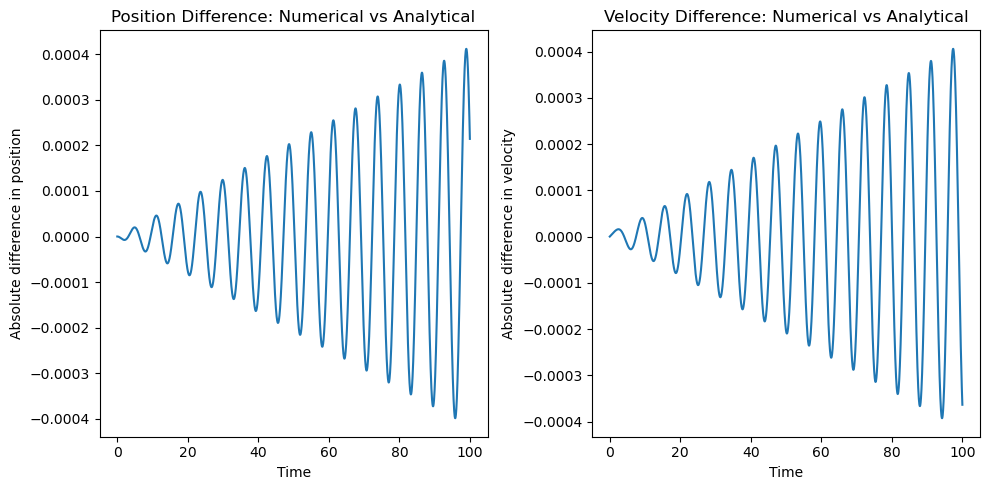

position error = 0.00041235886176956525
velocity error = 0.0004058754229571901


In [ ]:
# Set up the system
k = 1.0  # spring constant
m = 1.0  # mass
oscillator = HarmonicOscillator(k, m)

# Set up the integrator
dt = 0.01  # time step
integrator = VerletIntegrator(dt)

# Initial conditions
x0 = 1.0  # initial position
v0 = 0.0  # initial velocity

# Total simulation time
T = 100.0  # total time

# Compare solutions
times, diff_positions, diff_velocities = compare_solutions(oscillator, integrator, x0, v0, T, dt)

# Plot differences
plot_differences(times, diff_positions, diff_velocities)

print('position error =', max(diff_positions))
print('velocity error =', max(diff_velocities))



Verlet算法的误差主要来自于两个方面：

1. 截断误差：这是由于在Verlet积分公式中，对于物体的加速度，我们只保留了力的二阶泰勒展开，而忽略了高阶项引起的。这种误差通常与时间步长的平方成正比。

2. 舍入误差：这种误差主要是由于计算机在进行浮点运算时引入的。在计算的每一步中，都可能引入微小的舍入误差。然而，由于Verlet算法的递归性，这些小的误差可能会随着时间的推移而累积，从而影响结果的精度。

通常，为了减小这些误差，我们可以选择较小的时间步长，并确保对力的计算尽可能精确。然而，值得注意的是，选择过小的时间步长会导致计算成本增加，并可能增加舍入误差。因此，在实践中，需要找到一个平衡，使得时间步长足够小以提供所需的精度，同时又足够大以避免不必要的计算成本和舍入误差。

我们接下来考察误差随积分步长dt的变化

position errors: [0.00041235886176956525, 0.001649407015676929, 0.003711495200331783, 0.006598476828849696, 0.01031001643284267, 0.014845671635820299, 0.02021015791835292, 0.02640534074837583]
velocity errors: [0.0004058754229571901, 0.001623465036370706, 0.0036526573234197954, 0.0064941845213852024, 0.010146602326600938, 0.014610398993287312, 0.019889145708825776, 0.025979874689841257]


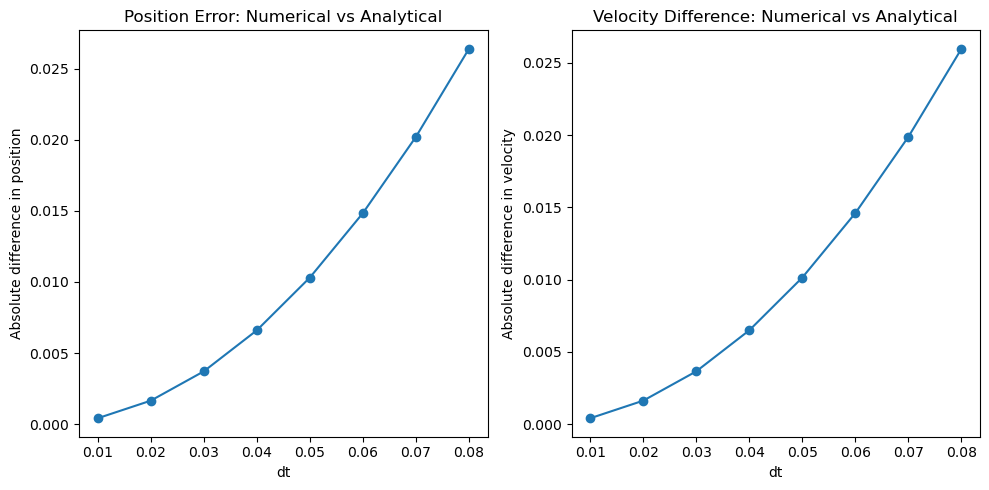

In [ ]:
# Set up the system
k = 1.0  # spring constant
m = 1.0  # mass
oscillator = HarmonicOscillator(k, m)

# Total simulation time
T = 100.0  # total time

stepSize = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
err_pos = []
err_vel = []

# Compare solutions
for dt in stepSize:
    integrator = VerletIntegrator(dt)
    times, diff_positions, diff_velocities = compare_solutions(oscillator, integrator, x0, v0, T, dt)
    err_pos.append(max(diff_positions))
    err_vel.append(max(diff_velocities))

print('position errors:',err_pos)
print('velocity errors:',err_vel)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(stepSize, err_pos,'o-')
plt.xlabel('dt')
plt.ylabel('Absolute difference in position')
plt.title('Position Error: Numerical vs Analytical')

plt.subplot(1, 2, 2)
plt.plot(stepSize, err_vel,'o-')
plt.xlabel('dt')
plt.ylabel('Absolute difference in velocity')
plt.title('Velocity Difference: Numerical vs Analytical')

plt.tight_layout()
plt.show()

我们可以看到，误差的积累随着dt呈抛物线二阶增长。

<a name="VelocityVerlet"></a>
## 4. Velocity Verlet积分算法

Velocity Verlet算法是一种常用于分子动力学模拟的数值积分方法。它是基于Verlet算法的一个变种，但相较于原始的Verlet算法，Velocity Verlet算法在每一步的计算中显式地包含了速度。

Velocity Verlet算法的工作原理如下：它首先根据当前位置和速度计算出下一时刻的位置，然后再根据新的位置计算出下一时刻的加速度，最后再用新的加速度和旧的加速度的平均值来更新速度。这种“分步”或“交错”的更新策略是Velocity Verlet算法得名的原因。

Velocity Verlet算法的一个重要特性是它是辛结构（symplectic），这意味着它在积分过程中保守了哈密顿系统的相应结构，使得在长时间的积分过程中，系统的能量得以良好的保存。这是在分子动力学模拟等需要精确模拟物理系统动力学的场合中，Velocity Verlet算法被广泛使用的原因。

接下来我们将Velocity Verlet积分算法封装在VelocityVerletIntegrator类里，算法的时间更新步如下：


$$step 1: v(t + dt/2) = v(t) + 0.5 * a(t) * dt$$

$$step 2:x(t + dt) = x(t) + v(t + dt/2) * dt$$

$$step 3: a(t + dt) \quad from \quad x(t+dt)$$

$$step 4: v(t + dt) = v(t + dt/2) + 0.5 * a(t + dt) * dt$$

Velocity Verlet基本的算法过程如下图所示：

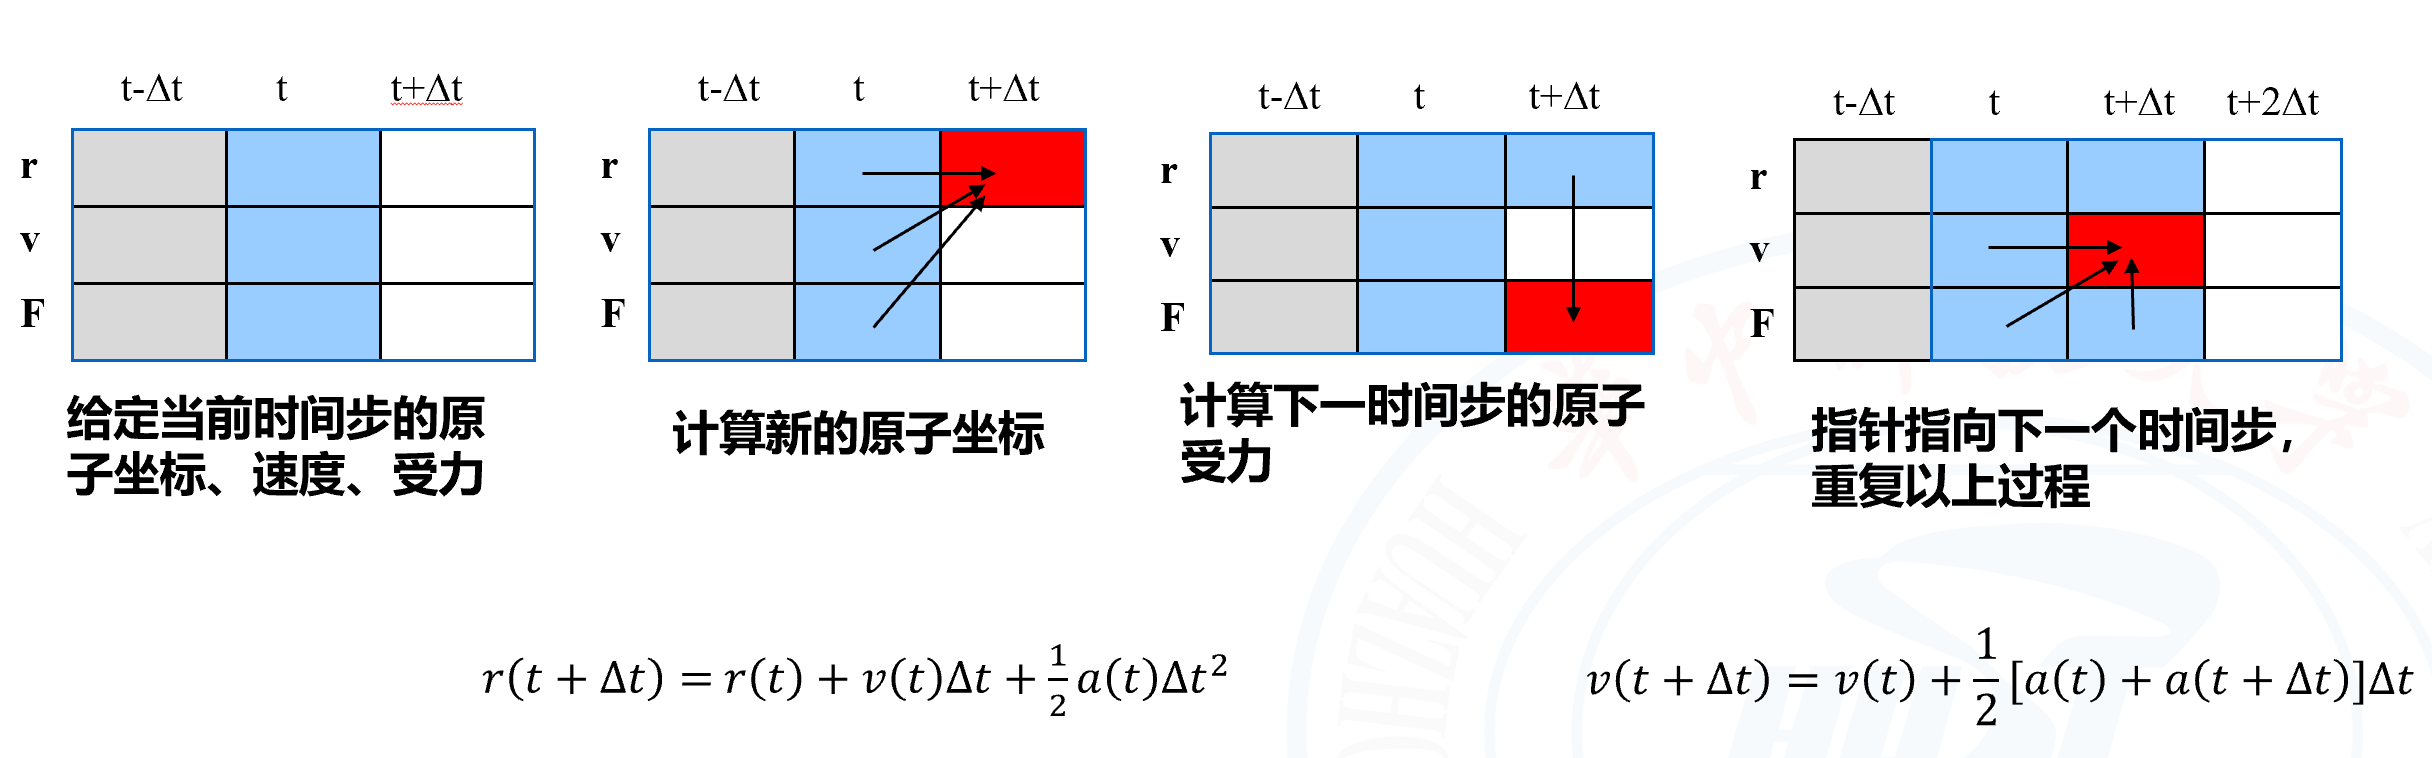

In [ ]:
class VelocityVerletIntegrator:
    """
    A numerical integrator using the Velocity Verlet method.
    """

    def __init__(self, dt):
        """
        Initialize the integrator.

        Parameters:
        dt : float
            Time step for the numerical integration.
        """
        self.dt = dt

    def step(self, system, x, v):
        """
        Perform one integration step.

        Parameters:
        system : object
            The physical system to be integrated. It should have a method `acceleration(x)` that computes the acceleration.
        x : float
            Current position.
        v : float
            Current velocity.

        Returns:
        float, float
            Updated position and velocity.
        """
        a = system.acceleration(x)
        x_new = x + self.dt * v + 0.5 * self.dt**2 * a
        a_new = system.acceleration(x_new)
        v_new = v + 0.5 * self.dt * (a + a_new)

        return x_new, v_new


接下来我们用dt=0.01的步长进行1000步的Velocity Verlet积分运算

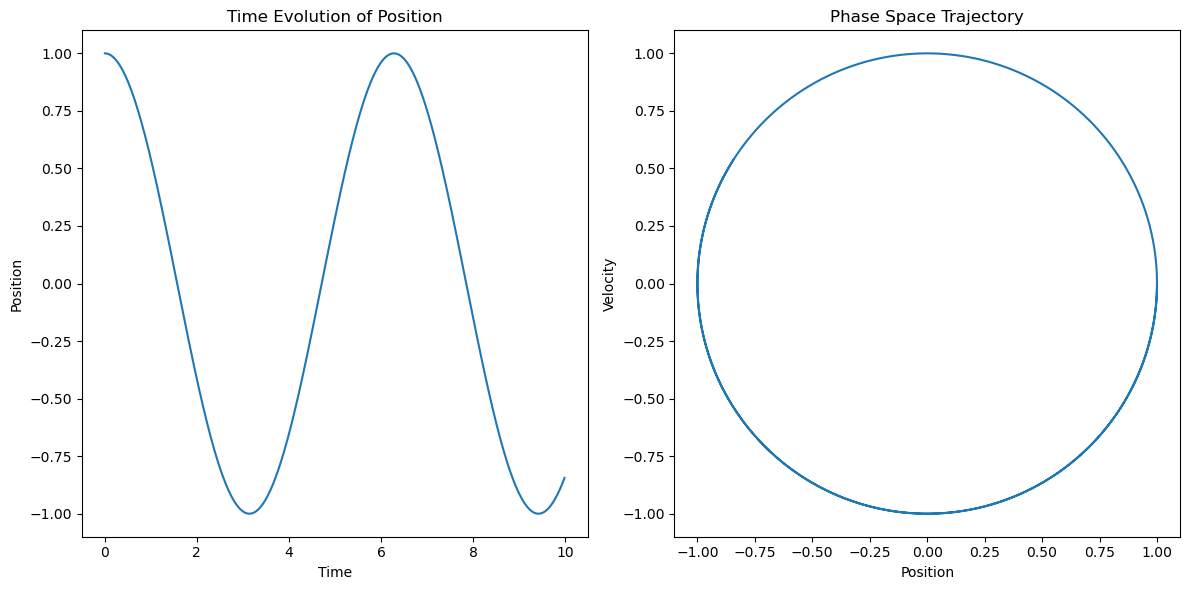

In [ ]:
import math

def main():
    # Set up the system
    k = 1.0  # spring constant
    m = 1.0  # mass
    oscillator = HarmonicOscillator(k, m)

    # Set up the integrator
    dt = 0.01  # time step
    integrator = VelocityVerletIntegrator(dt)

    # Initial conditions
    x = 1.0  # initial position
    v = 0.0  # initial velocity

    # Lists to store time, positions, and velocities
    times = []
    positions = []
    velocities = []

    # Time evolution
    for i in range(1000):
        times.append(i * dt)
        positions.append(x)
        velocities.append(v)
        x, v = integrator.step(oscillator, x, v)


    plot_results(times, positions, velocities)

if __name__ == "__main__":
    main()


上图展示了一维谐振子的位置和速度随时间变化的图像，当积分步长为$\Delta t=0.01$时，Velocity Verlet算法表现出了很好的稳定性。通过$r(t)$的振幅图可以看出，Velocity Verlet算法能够很好地维持正弦或余弦函数的振荡模式，并且振幅随时间保持恒定。同时，$r(t)\sim v(t)$图形成了一个封闭的圆环，这与理论上一维谐振子的相空间区域完全吻合，说明Velocity Verlet算法能够很好地保持系统动力学的守恒性质。

<a name="Leapfrog"></a>
## 5. Leapfrog积分算法

Leapfrog积分算法是一种常见的用于求解二阶常微分方程的数值方法，特别适用于物理系统的模拟，如分子动力学和天体力学。Leapfrog积分算法的名字来源于其更新位置和速度的方式，这两个变量在时间步上像青蛙跳跃般交错，即在相同的时间步，位置和速度的更新是分开的，这也是Leapfrog算法的一个显著特点。

Leapfrog积分算法的主要优点是它的精度和稳定性。这是因为Leapfrog算法是一个对称的、可逆的算法，这种性质使得在进行物理模拟时，它能很好的保持系统的能量守恒。

然而，Leapfrog积分算法也有一些缺点。对于某些问题，比如处理粘性力或者摩擦力的问题，可能会有一些困难。Leapfrog积分算法在许多物理模拟中都被广泛使用，因为它的简单性、精度和稳定性。


接下来我们将Leapfrog积分算法封装在LeapfrogIntegrator类里，算法的时间更新步如下：


$$r(t + dt) = r(t) + v(t+dt/2)*dt$$

$$v(t + dt/2) = v(t-dt/2) + \frac{F(t)}{m} * dt$$


Leapfrog基本的算法过程如下图所示：


In [ ]:
class LeapfrogIntegrator:
    """
    LeapfrogIntegrator is a class for the Leapfrog integration method.

    Attributes:
        dt: The timestep for integration.

    Methods:
        step(system, x, v): Perform one step of Leapfrog integration.
    """
    def __init__(self, dt):
        self.dt = dt

    def step(self, system, x, v):
        """
        Parameters:
        x : float
            current position
        v : float
            velocity at current minus half timestep

        Returns:
        x_next : float
            position at next time step
        v_next : float
            velocity at next half timestep
        """
        a = system.acceleration(x)
        v_next = v + self.dt * a
        x_next = x + self.dt * v_next
        return x_next, v_next


接下来我们用dt=0.01的步长进行1000步的Leapfrog积分运算，下图展示了一维谐振子的位置和速度随时间变化的图像，leapfrog算法表现出了很好的稳定性。

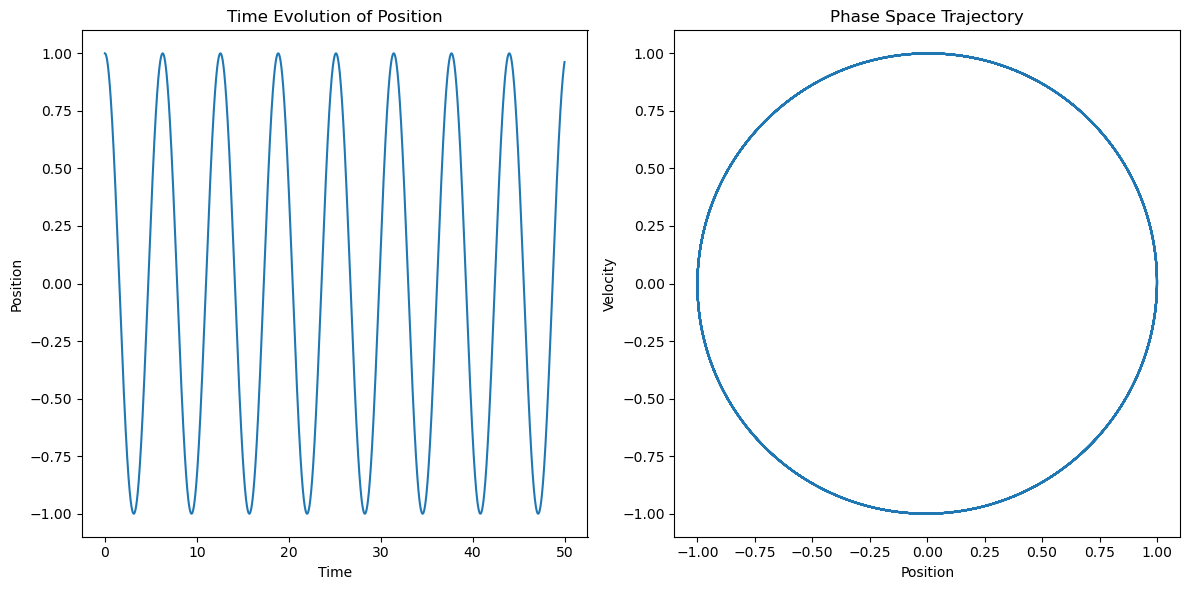

In [ ]:
import math

def main():
    # Set up the system
    k = 1.0  # spring constant
    m = 1.0  # mass
    oscillator = HarmonicOscillator(k, m)

    # Set up the integrator
    dt = 0.01  # time step
    integrator = LeapfrogIntegrator(dt)

    # Initial conditions
    x0 = 1.0  # initial position
    v0 = 0.0  # initial velocity

    # Lists to store time, positions, and velocities
    times = []
    positions = []
    velocities = []

    # Get velocity at -dt/2 timestep
    x = x0
    v = v0 - 0.5 * dt * oscillator.acceleration(x0)

    # Time evolution
    for i in range(5000):
        times.append(i * dt)
        positions.append(x)
        velocities.append(v)
        x, v = integrator.step(oscillator, x, v)


    plot_results(times, positions, velocities)

if __name__ == "__main__":
    main()





分子动力学积分算法就像世界上的各种舞蹈风格。**Euler方法**就像初学者的踢踏舞，简单直接，但可能会失去节奏。**Verlet算法**则更像华尔兹，流畅优雅且能量守恒。如果你喜欢更多的复杂性，那么**Velocity Verlet**就像探戈，每一步都充满激情，但也需要更多的技巧。而**Leapfrog方法**无疑是跳舞的青蛙王子，跳起舞来有时速度快、有时位置准，总之就是乐趣十足。

选择积分算法就像选择你最喜欢的舞蹈，最重要的是要享受每一步并确保不会摔倒！



<a name="references"></a>
# 参考

- https://www.bilibili.com/video/BV19X4y187CS/
- https://www.bilibili.com/video/BV11N411C7fN/
- https://www.bilibili.com/video/BV1zP411X72Z/
- https://www.bilibili.com/video/BV18W4y1R7mx/
- https://www.bilibili.com/video/BV1Xm4y1Y7Ua/
- https://www.bilibili.com/video/BV1iP411B7YB/
- https://www.bilibili.com/video/BV13W4y1Q7WV/
- https://www.bilibili.com/video/BV16N41167HX/
- https://www.bilibili.com/video/BV1Gs4y1C7CA/